## UNIVARIATE ANALYSIS 

## 2.1 bar chart of top airlines by number of flights
- Shows which airlines operate the most flights in the dataset.
- Helps compare airlines directly to understand market presence or dominance.

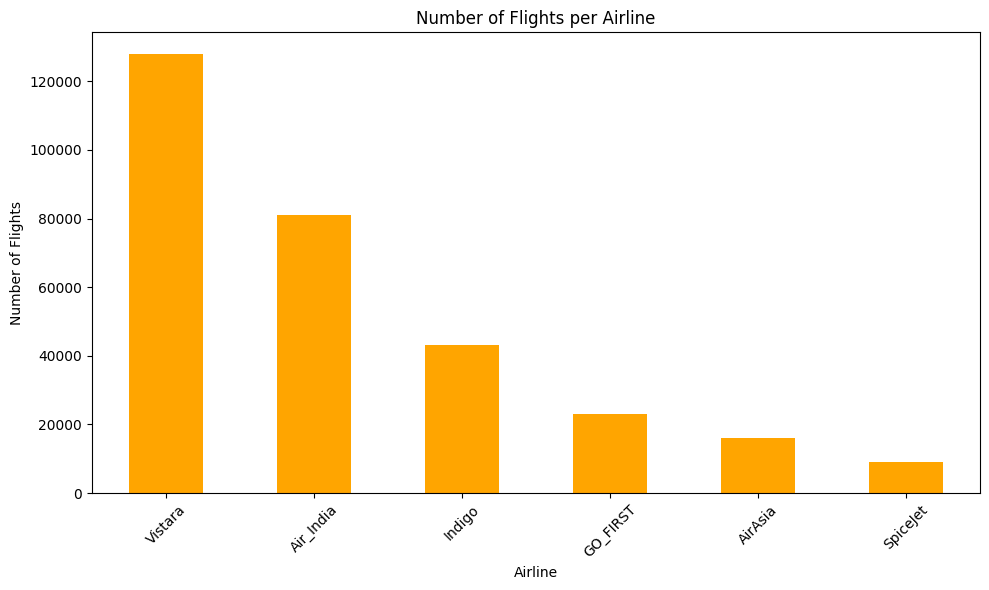

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


Flights_data =pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data.csv")

Flights_data['airline'].value_counts().plot(
    kind='bar',
    figsize=(10,6),
    color='Orange',
)

plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')  
                                  


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


===========================================================================================================================


## 2.2 Histogram of Flight Prices
- Shows how flight prices are distributed (cheap vs expensive, clusters, spread).
- Helps identify patterns like skewness, common price ranges, or unusual outliers.

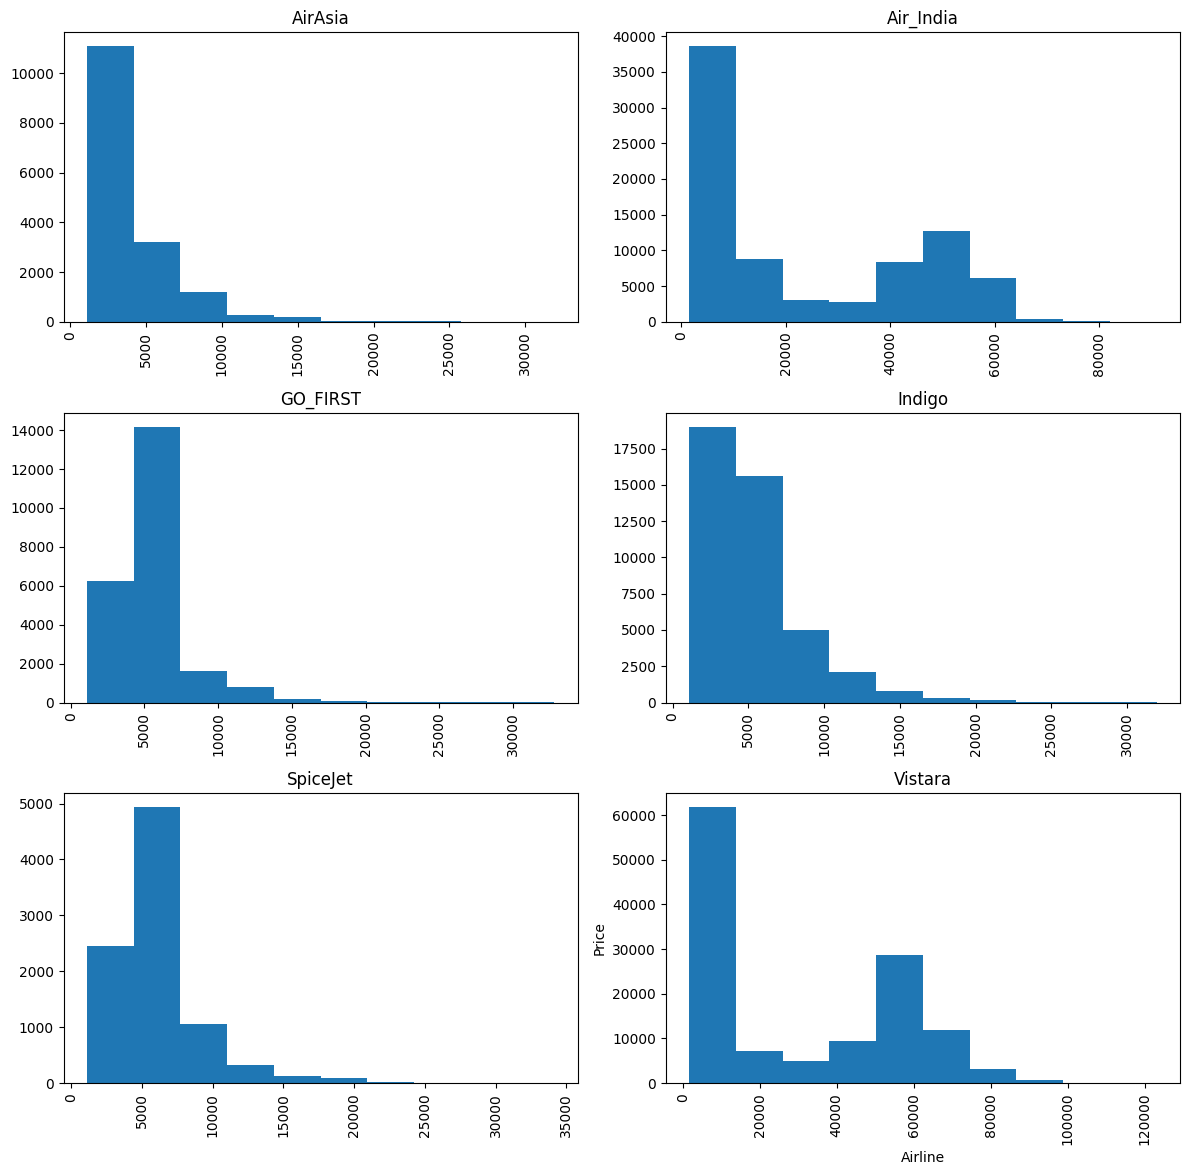

In [ ]:
## Flight Prices by Airline using Histogram
import matplotlib.pyplot as plt
  
Flights_data.hist(column='price', by='airline',figsize=(12,12))

plt.suptitle('')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

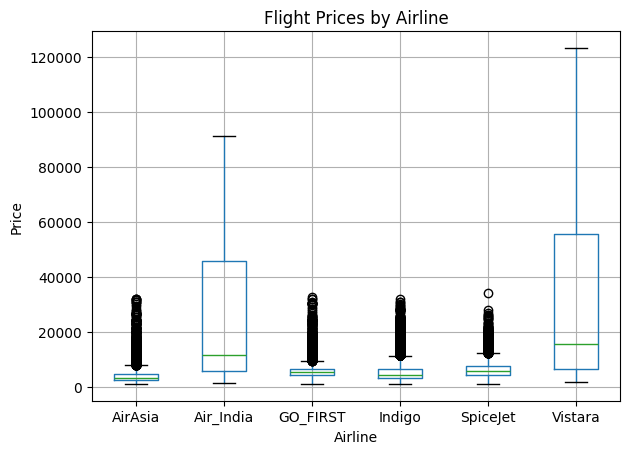

In [8]:
## price vs airline by boxplot

Flights_data.boxplot(column='price', by='airline')

plt.title('Flight Prices by Airline')
plt.suptitle('')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

## 2.3 Analysis of Flights Based on Stop Count

- Shows how flights are distributed across different stop categories such as non-stop, one-stop, and multi-stop routes.
- Helps identify whether passengers in the dataset mostly travel through direct flights or connecting flights.

In [3]:
Flights_data['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

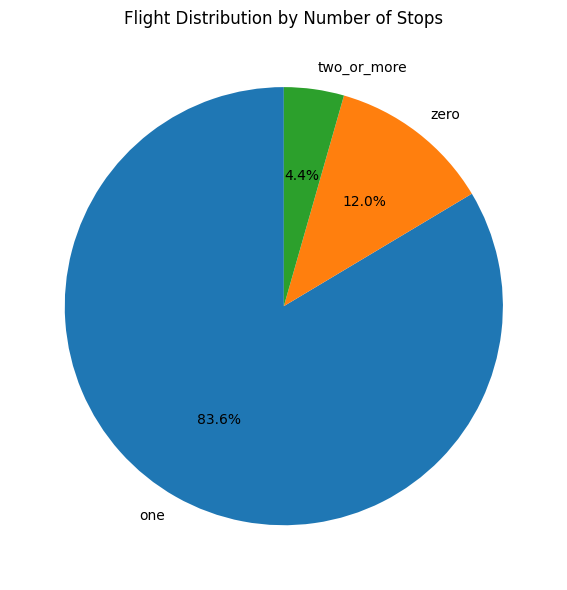

In [8]:
import matplotlib.pyplot as plt

Flights_data['stops'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8,6),
    startangle=90
)

plt.title('Flight Distribution by Number of Stops')
plt.ylabel('')
plt.tight_layout()
plt.show()


## 2.4 Departure Time Distribution
- Shows how many flights depart during each time of day, from Early Morning to Late Night.
- Helps identify the busiest departure period and understand when most flights operate.

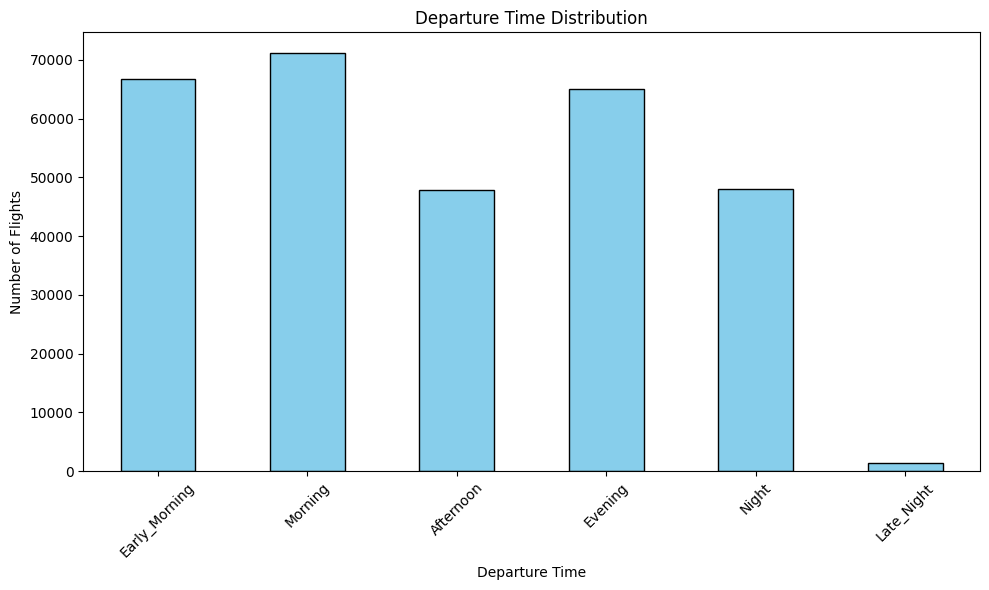

In [9]:
plt.figure(figsize=(10,6))

Flights_data['departure_time'].value_counts().reindex([
    'Early_Morning', 'Morning', 'Afternoon', 
    'Evening', 'Night', 'Late_Night'
]).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Departure Time Distribution')
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2.5 Flight Duration Distribution 
- Visualizes how flight durations are spread across the dataset, showing minimum, maximum, and typical duration ranges.
- Helps identify whether most flights are short, medium, or long duration without using a histogram.

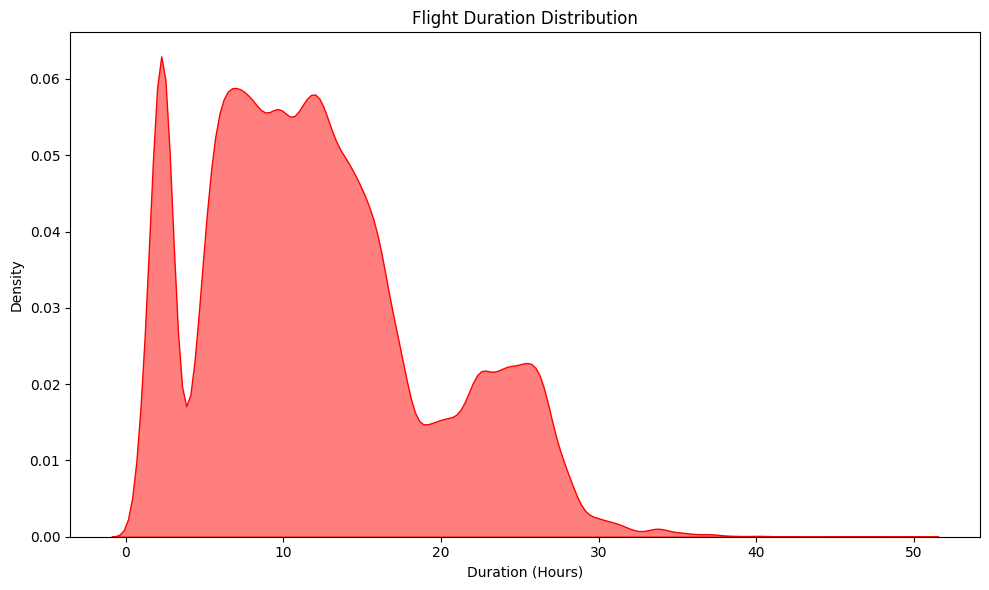

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))

sns.kdeplot(Flights_data['duration'], fill=True, color='red', alpha=0.5)

plt.title('Flight Duration Distribution')
plt.xlabel('Duration (Hours)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


===========================================================================================================================


===========================================================================================================================


## BIVARIATE ANALYSIS 

## 2.6 Boxplot of price vs class
- Compares the average flight prices between Economy and Business classes.
- Helps identify which class is generally more expensive in a simple, easy-to-read way.

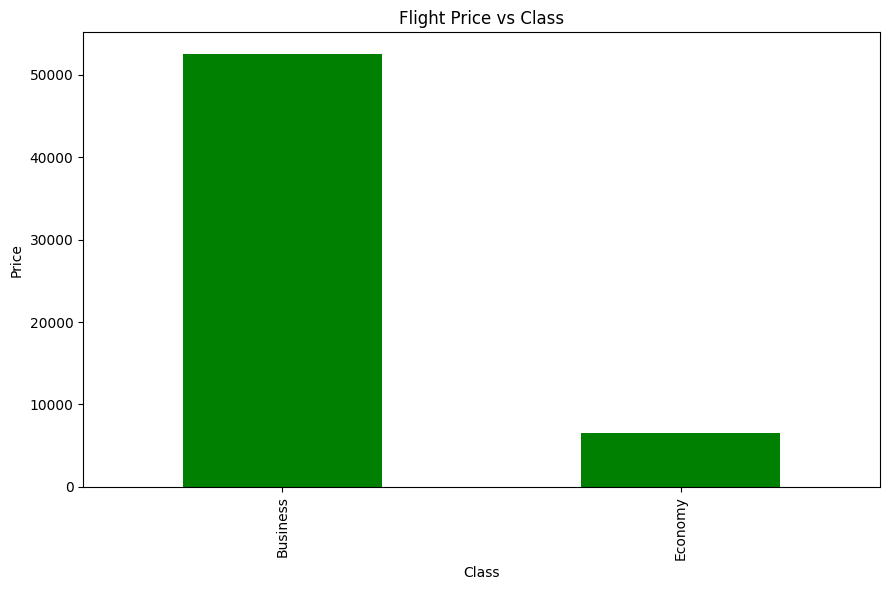

In [14]:
## Price vs Class by grouped bar plot

plt.figure(figsize=(9,6))
Flights_data.groupby('class')['price'].mean().plot(kind='bar', color='Green',)

plt.title('Flight Price vs Class')

plt.xlabel('Class')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


===========================================================================================================================


##  2.7 Price vs Days_left by Simple Line plot
- Shows how the average flight price changes depending on how many days are left before the journey.
- Helps identify whether booking early or late has an impact on flight cost in a clear and easy-to-understand way. 

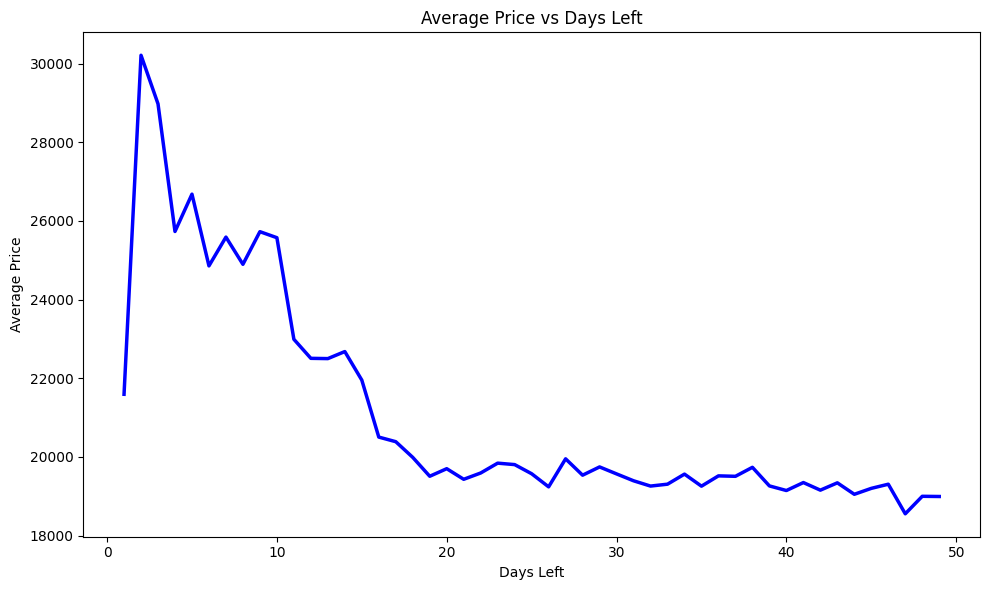

In [13]:
## Price vs Days Left by Simple line plot
import matplotlib.pyplot as plt
import pandas as pd 

Flights_data=pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data.csv")

avg_by_day = Flights_data.groupby('days_left')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(avg_by_day['days_left'], avg_by_day['price'], linewidth=2.5, color='blue')

plt.title('Average Price vs Days Left')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()









# plt.figure(figsize=(10,6))
# plt.scatter(Flights_data['days_left'], Flights_data['price'], alpha=0.5)

# plt.title('Price vs Days Left')
# plt.xlabel('Days Left Before Journey')
# plt.ylabel('Price')
# plt.tight_layout()
# plt.show()




===========================================================================================================================


## 2.8 Counting departure_time vs arrival_time by Plot bar graph 
- Shows how many flights take off during each part of the day, from Early Morning to Late Night.
- Helps identify the busiest departure periods, making it easy to see when most flights operate.


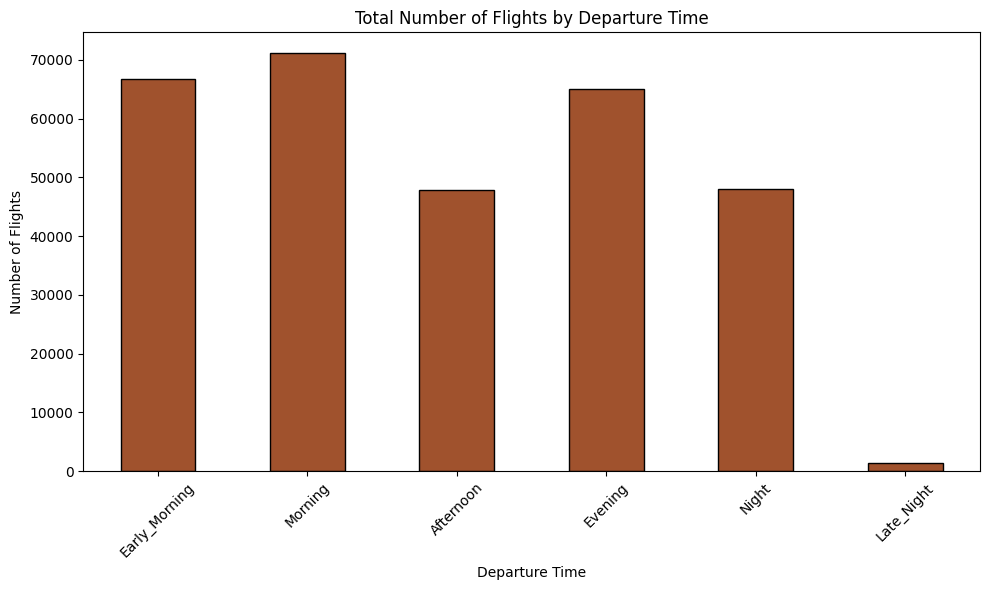

In [34]:
# Departure Time vs Number of Flights by Bar plot
plt.figure(figsize=(10,6))

Flights_data['departure_time'].value_counts().reindex([
    'Early_Morning', 'Morning', 'Afternoon', 
    'Evening', 'Night', 'Late_Night'
]).plot(kind='bar', color='sienna', edgecolor='black')

plt.title('Total Number of Flights by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


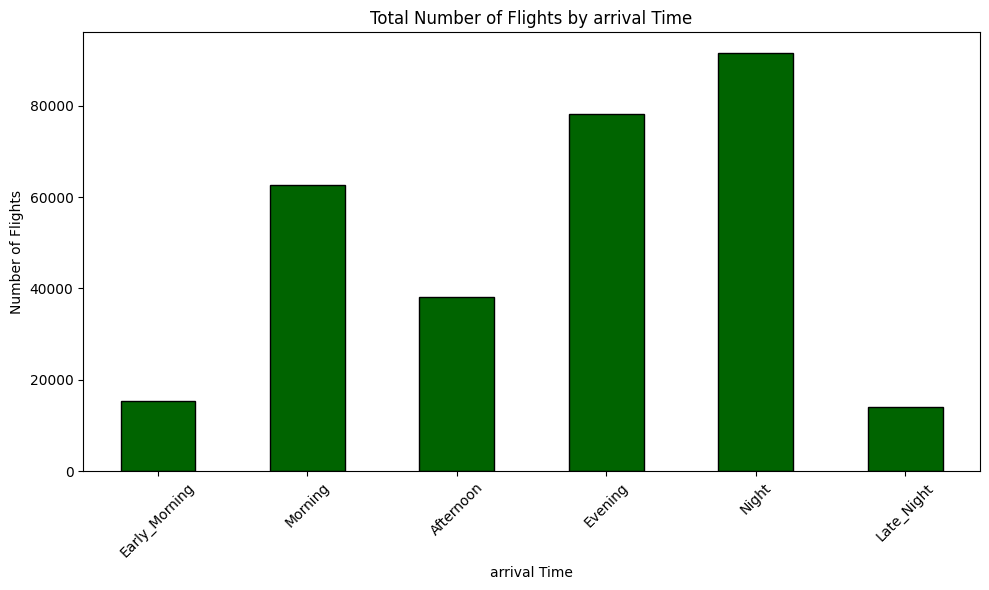

In [ ]:
# Arrival Time vs Number of Flights by Bar plot
plt.figure(figsize=(10,6))


Flights_data['arrival_time'].value_counts().reindex([
    'Early_Morning', 'Morning', 'Afternoon', 
    'Evening', 'Night', 'Late_Night'
]).plot(kind='bar', color='darkgreen', edgecolor='black')

plt.title('Total Number of Flights by arrival Time')
plt.xlabel('arrival Time')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

===========================================================================================================================


## 2.9 Analyzing routes between source_city and destination_city
- Shows which city-to-city routes have the highest number of flights, helping identify the busiest travel corridors.
- Helps understand major travel demand patterns between source and destination cities.

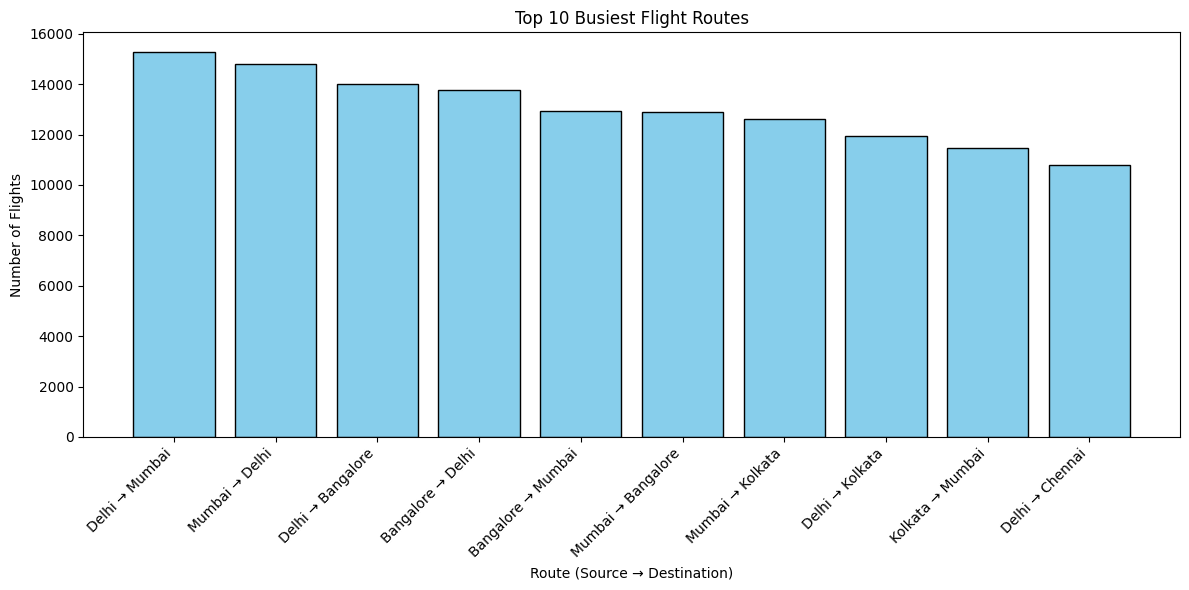

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column combining source and destination
Flights_data=pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data.csv")
Flights_data['route'] = Flights_data['source_city'] + " → " + Flights_data['destination_city']

# Count routes
top_routes = Flights_data['route'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
plt.bar(top_routes.index, top_routes.values, color='skyblue', edgecolor='black')

plt.title('Top 10 Busiest Flight Routes')
plt.xlabel('Route (Source → Destination)')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
 

===========================================================================================================================


===========================================================================================================================


# ⭐ Univariate Analysis (studying one variable at a time)

In univariate analysis, we explored single columns from the dataset to understand their individual behavior.

## What I did:

### 1. Bar chart of top airlines by number of flights
- Showed which airlines operate the most flights.  
- Helped identify the most active and least active airlines.

### 2. Histogram of flight prices
- Showed how flight prices are distributed (cheap vs expensive).  
- Helped identify common price ranges and any unusually high or low prices.

**Univariate = understanding one feature on its own.**

---

# ⭐ Bivariate Analysis (studying the relationship between two variables)

In bivariate analysis, we compared two variables together to understand patterns or relationships.

## What I did:

### 1. Price vs Class (bar chart / boxplot)
- Compared how prices differ between classes like Economy and Business.  
- Showed which class is generally more expensive.

### 2. Price vs Days Left (simple line plot)
- Showed how average price changes depending on how early the ticket is booked.  
- Helped us see whether booking early or late impacts price.

### 3. Departure_time vs Arrival_time (bar chart )
- Showed how departure times relate to arrival times.  
- Helped identify flight timing patterns throughout the day.

### 4. Routes between source_city and destination_city (bar chart)
- Identified the busiest routes by counting source-to-destination flights.  
- Helped understand travel demand between cities.

**Bivariate = comparing two variables to see how they behave together.**
